# 1. Import packages and load dataset



In [1]:
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python      
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
from scipy import stats                   # summary statistics
import random
import math

In [2]:
df = pd.read_csv('8_sample_data.csv')     # load our data table

Plotting parameters

In [8]:
pormin = 0.05; pormax = 0.25
permmin = 0.01; permmax = 1000;                # user specified min and max
AImin = 1000.0; AImax = 6000
Fmin = 0; Fmax = 1

xmin = 0.0; xmax = 1000.0               # range of x values
ymin = 0.0; ymax = 1000.0               # range of y values
pormin = 0.05; pormax = 0.25
permmin = 0.01; permmax = 300;                # user specified min and max
AImin = 1000.0; AImax = 6000
Fmin = 0; Fmax = 1
cmap = plt.cm.plasma                    # color map

# 2. Declustering

In [6]:
print("declustering porosity:")
wts_porosity, cell_sizes, dmeans = geostats.declus(df,'X','Y','Porosity',iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)
df['Wts_porosity'] = wts_porosity # add weights to the sample data DataFrame
print("\ndeclustering permeability:")
wts_perm, cell_sizes, dmeans = geostats.declus(df,'X','Y','Perm',iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)
df['Wts_perm'] = wts_perm# add weights to the sample data DataFrame
print("\ndeclustering AI:")
wts_AI, cell_sizes, dmeans = geostats.declus(df,'X','Y','AI',iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)
df['Wts_AI'] = wts_AI                        # add weights to the sample data DataFrame

df.describe()                                  # preview to check the sample data DataFrame

declustering porosity:
There are 168 data with:
   mean of      0.15391629523632155 
   min and max  0.0808837694350806 and 0.2494536799448483
   standard dev 0.033906041125275496 

declustering permeability:
There are 168 data with:
   mean of      77.40357185885863 
   min and max  0.046707210006564456 and 2056.7291327432786
   standard dev 202.3448434205727 

declustering AI:
There are 168 data with:
   mean of      3396.279944373145 
   min and max  1189.8579070757687 and 5186.2913136919315
   standard dev 746.759421225971 


,Unnamed: 0,X,Y,Facies,Porosity,Perm,AI,Wts_porosity,Wts_perm,Wts_AI
count,168.000000,168.000000,168.00000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,207.767857,514.345238,465.87500,0.666667,0.153916,77.403572,3396.279944,1.000000,1.000000,1.000000
std,114.277788,290.006483,286.99991,0.472814,0.034007,202.949762,748.991891,0.647128,0.609475,0.049482
min,3.000000,0.000000,20.00000,0.000000,0.080884,0.046707,1189.857907,0.440571,0.506728,0.553293
25%,104.000000,260.000000,209.00000,0.000000,0.130374,2.889615,2923.281779,0.653528,0.635996,1.005988
50%,216.500000,490.000000,439.50000,1.000000,0.150119,12.088688,3456.145034,0.830125,0.771369,1.005988
75%,306.750000,780.000000,729.00000,1.000000,0.177243,65.522793,3957.836990,1.127196,1.110217,1.005988
max,381.000000,990.000000,979.00000,1.000000,0.249454,2056.729133,5186.291314,6.718435,4.120423,1.005988


Porosity naive mean is 0.154.
Porosity declustered mean is 0.149.
Correction of 0.035.

Summary statistics of the declsutering weights:
DescribeResult(nobs=168, minmax=(0.44057085453928546, 6.7184347826086945), mean=1.0, variance=0.4187743992154122, skewness=4.848628429613621, kurtosis=35.863175048959604)


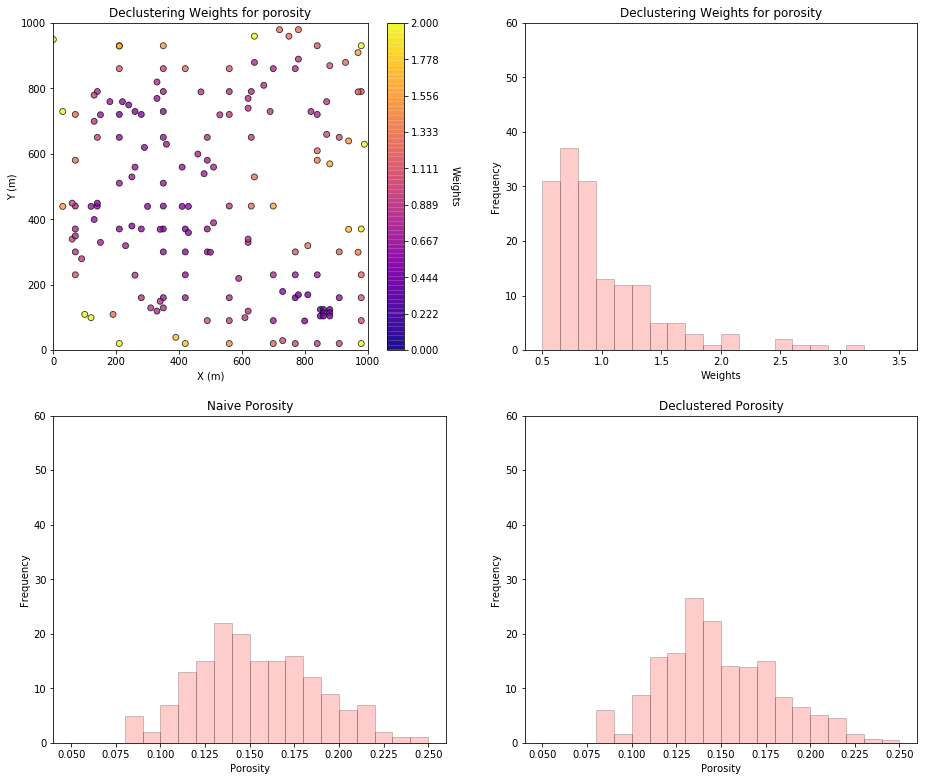

In [9]:
plt.subplot(221)
GSLIB.locmap_st(df,'X','Y','Wts_porosity',xmin,xmax,ymin,ymax,0.0,2.0,'Declustering Weights for porosity','X (m)','Y (m)','Weights',cmap)

plt.subplot(222)
GSLIB.hist_st(df['Wts_porosity'],0.5,3.5,log=False,cumul=False,bins=20,weights=None,xlabel="Weights",title="Declustering Weights for porosity")
plt.ylim(0.0,60)

plt.subplot(223)
GSLIB.hist_st(df['Porosity'],0.05,0.25,log=False,cumul=False,bins=20,weights=None,xlabel="Porosity",title="Naive Porosity")
plt.ylim(0.0,60)

plt.subplot(224)
GSLIB.hist_st(df['Porosity'],0.05,0.25,log=False,cumul=False,bins=20,weights=df['Wts_porosity'],xlabel="Porosity",title="Declustered Porosity")
plt.ylim(0.0,60)

por_mean = np.average(df['Porosity'].values)
por_dmean = np.average(df['Porosity'].values,weights=df['Wts_porosity'].values)

print('Porosity naive mean is ' + str(round(por_mean,3))+'.')
print('Porosity declustered mean is ' + str(round(por_dmean,3))+'.')
cor = (por_mean-por_dmean)/por_mean
print('Correction of ' + str(round(cor,4)) +'.')

print('\nSummary statistics of the declsutering weights:')
print(stats.describe(wts_porosity))

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.5, wspace=0.2, hspace=0.2)
plt.show()

Perm naive mean is 77.404.
Perm declustered mean is 62.868.
Correction of 0.1878.

Summary statistics of the declustering weights:
DescribeResult(nobs=168, minmax=(0.5067275493932278, 4.12042328042328), mean=0.9999999999999997, variance=0.37145951364983404, skewness=2.3689998464278452, kurtosis=6.369098392224354)


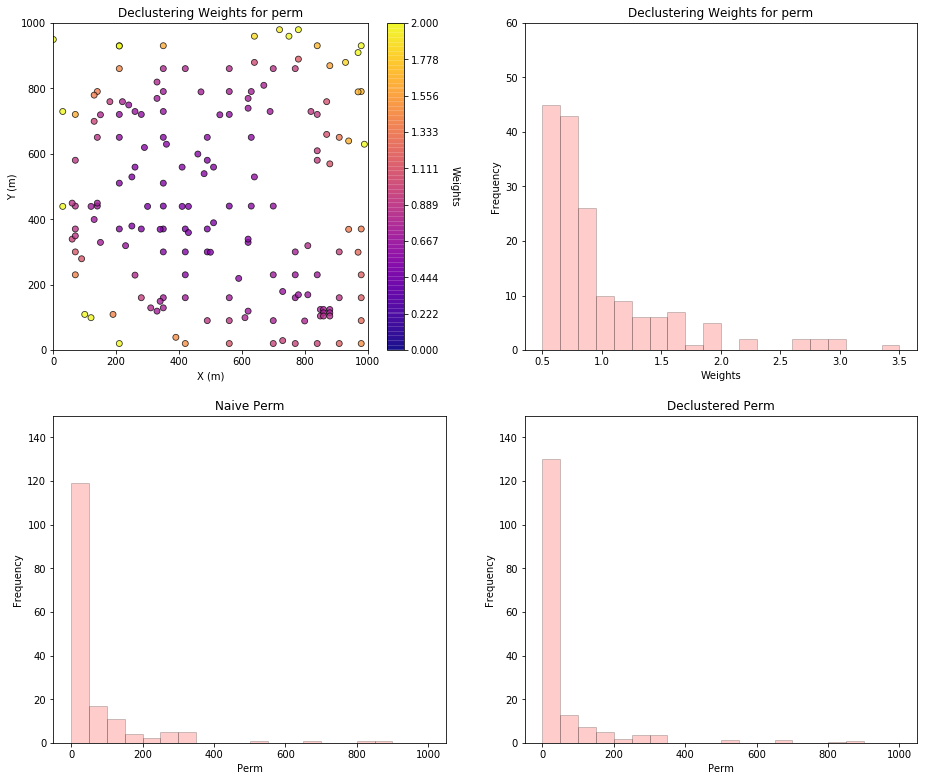

In [11]:
plt.subplot(221)
GSLIB.locmap_st(df,'X','Y','Wts_perm',xmin,xmax,ymin,ymax,0.0,2.0,'Declustering Weights for perm','X (m)','Y (m)','Weights',cmap)

plt.subplot(222)
GSLIB.hist_st(df['Wts_perm'],0.5,3.5,log=False,cumul=False,bins=20,weights=None,xlabel="Weights",title="Declustering Weights for perm")
plt.ylim(0.0,60)

plt.subplot(223)
GSLIB.hist_st(df['Perm'],0.01,1000,log=False,cumul=False,bins=20,weights=None,xlabel="Perm",title="Naive Perm")
plt.ylim(0.0,150)

plt.subplot(224)
GSLIB.hist_st(df['Perm'],0.01,1000,log=False,cumul=False,bins=20,weights=df['Wts_perm'],xlabel="Perm",title="Declustered Perm")
plt.ylim(0.0,150)

perm_mean = np.average(df['Perm'].values)
perm_dmean = np.average(df['Perm'].values,weights=df['Wts_perm'].values)

print('Perm naive mean is ' + str(round(perm_mean,3))+'.')
print('Perm declustered mean is ' + str(round(perm_dmean,3))+'.')
cor = (perm_mean-perm_dmean)/perm_mean
print('Correction of ' + str(round(cor,4)) +'.')

print('\nSummary statistics of the declustering weights:')
print(stats.describe(wts_perm))

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.5, wspace=0.2, hspace=0.2)
plt.show()

### Calculate declustered porosity and permeability and separate by facies

In [31]:
df['Perm_declus']=(df['Perm'].values)*(df['Wts_perm'].values)
df['Porosity_declus']=(df['Porosity'].values)*(df['Wts_porosity'].values)

In [36]:
print(df.iloc[0:5,:])                   # display first 4 samples in the table as a preview
df.head(n=13)                           # we could also use this command for a table preview
df.to_csv('declustered_data.csv')
df_0=df.loc[(df['Facies'] == 0.0)] 
df_1=df.loc[(df['Facies'] == 1.0)]

   Unnamed: 0     X      Y  Facies  Porosity        Perm           AI  \
0           3  70.0  720.0     0.0  0.122222    4.429608  3742.749607   
1           5  70.0  580.0     1.0  0.179878   24.693697  3658.744772   
2           7  70.0  440.0     0.0  0.105756    7.599281  3455.798301   
3           8  70.0  370.0     1.0  0.170508  329.655289  3318.756765   
4           9  70.0  300.0     0.0  0.126346   10.619642  4039.457362   

   Wts_porosity  Wts_perm    Wts_AI  Perm_declus  Porosity_declus  
0      1.260282  1.630396  1.005988     7.222017         0.154034  
1      1.310366  0.890396  1.005988    21.987178         0.235706  
2      0.798074  0.853552  1.005988     6.486380         0.084401  
3      0.785574  0.877768  1.005988   289.360860         0.133946  
4      0.858074  1.110217  1.005988    11.790105         0.108415  


In [33]:
df.describe()

,Unnamed: 0,X,Y,Facies,Porosity,Perm,AI,Wts_porosity,Wts_perm,Wts_AI,Perm_declus,Porosity_declus
count,168.000000,168.000000,168.00000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,207.767857,514.345238,465.87500,0.666667,0.153916,77.403572,3396.279944,1.000000,1.000000,1.000000,62.868121,0.148536
std,114.277788,290.006483,286.99991,0.472814,0.034007,202.949762,748.991891,0.647128,0.609475,0.049482,166.560660,0.088469
min,3.000000,0.000000,20.00000,0.000000,0.080884,0.046707,1189.857907,0.440571,0.506728,0.553293,0.069407,0.057774
25%,104.000000,260.000000,209.00000,0.000000,0.130374,2.889615,2923.281779,0.653528,0.635996,1.005988,2.579100,0.099211
50%,216.500000,490.000000,439.50000,1.000000,0.150119,12.088688,3456.145034,0.830125,0.771369,1.005988,10.637943,0.123226
75%,306.750000,780.000000,729.00000,1.000000,0.177243,65.522793,3957.836990,1.127196,1.110217,1.005988,58.030568,0.165906
max,381.000000,990.000000,979.00000,1.000000,0.249454,2056.729133,5186.291314,6.718435,4.120423,1.005988,1637.906742,0.916554


# 3. Uncertainty Model using Bootstrapping

In [49]:
def bootstrap(L,value,weights,length,variable):
    L = 1000                                   # set the number of realizations
    mean = np.zeros(L); stdev = np.zeros(L)    # declare arrays to hold the realizations of the statistics
    for l in range(0, L):                      # loop over realizations
        samples = random.choices(value, weights=weights, cum_weights=None, k=length)
        mean[l] = np.average(samples)
        stdev[l] = np.std(samples)
        
    print('Summary Statistics for Bootstrap '+ variable + ' Mean Realizations:')
    print(stats.describe(mean))
    print('P10 ' + str(round(np.percentile(mean,10),3)) + ', P50 ' + str(round(np.percentile(mean,50),3)) + ', P90 ' + str(round(np.percentile(mean,90),3))) 

    print('\nSummary Statistics for Bootstrap '+ variable + ' Standard Deviation Realizations:')
    print(stats.describe(stdev))
    print('P10 ' + str(round(np.percentile(stdev,10),3)) + ', P50 ' + str(round(np.percentile(stdev,50),3)) + ', P90 ' + str(round(np.percentile(stdev,90),3))) 
    return np.mean(mean),np.std(stdev)

L=1000

In [54]:
mean_porosity_facies0,std_porosity_facies0=bootstrap(L,df_0['Porosity'].values,df_0['Wts_porosity'].values,len(df_0),'Facies 0 Porosity')

Summary Statistics for Bootstrap Facies 0 Porosity Mean Realizations:
DescribeResult(nobs=1000, minmax=(0.1194878763054035, 0.14187223814133068), mean=0.1300643866360233, variance=9.94685134979193e-06, skewness=0.18342101663418992, kurtosis=0.2395229592154089)
P10 0.126, P50 0.13, P90 0.134

Summary Statistics for Bootstrap Facies 0 Porosity Standard Deviation Realizations:
DescribeResult(nobs=1000, minmax=(0.015455238212918854, 0.031322613838560186), mean=0.023138997345699373, variance=6.879029183968777e-06, skewness=0.01422660066249461, kurtosis=-0.2507771153743441)
P10 0.02, P50 0.023, P90 0.026


In [55]:
mean_porosity_facies1,std_porosity_facies1=bootstrap(L,df_1['Porosity'].values,df_1['Wts_porosity'].values,len(df_1),'Facies 1 Porosity')

Summary Statistics for Bootstrap Facies 1 Porosity Mean Realizations:
DescribeResult(nobs=1000, minmax=(0.1503070803817747, 0.1687038078180356), mean=0.15972802090044905, variance=8.990026833890524e-06, skewness=-0.1699034567524044, kurtosis=0.01650604337045447)
P10 0.156, P50 0.16, P90 0.164

Summary Statistics for Bootstrap Facies 1 Porosity Standard Deviation Realizations:
DescribeResult(nobs=1000, minmax=(0.02541694028447137, 0.03822849442716315), mean=0.03168686932592681, variance=4.34669156624526e-06, skewness=0.008624972284639083, kurtosis=-0.058876361501100316)
P10 0.029, P50 0.032, P90 0.034


In [56]:
mean_perm_facies0,std_perm_facies0=bootstrap(L,df_0['Perm'].values,df_0['Wts_perm'].values,len(df_0),'Facies 0 Perm')

Summary Statistics for Bootstrap Facies 0 Perm Mean Realizations:
DescribeResult(nobs=1000, minmax=(3.559933229120395, 26.877164992361223), mean=11.222734973510889, variance=16.245063515079156, skewness=0.7363640080739912, kurtosis=0.5805826946398733)
P10 6.433, P50 10.741, P90 16.565

Summary Statistics for Bootstrap Facies 0 Perm Standard Deviation Realizations:
DescribeResult(nobs=1000, minmax=(4.1537816572956485, 57.14851004809077), mean=28.357815160408347, variance=126.66658913036106, skewness=-0.20987822654622715, kurtosis=-0.541347204502991)
P10 9.968, P50 28.172, P90 42.065


In [57]:
mean_perm_facies1,std_perm_facies1=bootstrap(L,df_1['Perm'].values,df_1['Wts_perm'].values,len(df_1),'Facies 1 Perm')

Summary Statistics for Bootstrap Facies 1 Perm Mean Realizations:
DescribeResult(nobs=1000, minmax=(45.29919365782674, 206.37700476395815), mean=98.07905248256742, variance=500.8148031859413, skewness=0.6830348611544685, kurtosis=0.838157130810798)
P10 72.452, P50 94.895, P90 128.022

Summary Statistics for Bootstrap Facies 1 Perm Standard Deviation Realizations:
DescribeResult(nobs=1000, minmax=(65.8903407666724, 476.3449649616494), mean=217.05215652626234, variance=5087.6875768864775, skewness=0.29189211886312527, kurtosis=-0.46430025687614007)
P10 127.518, P50 226.342, P90 307.731


In [59]:
mean_facies1_proportion,std_facies1_proportion=bootstrap(L,df['Facies'].values,df['Wts_porosity'].values,len(df),'Facies 1 Proportion')

Summary Statistics for Bootstrap Facies 1 Proportion Mean Realizations:
DescribeResult(nobs=1000, minmax=(0.5119047619047619, 0.7380952380952381), mean=0.622125, variance=0.0014078602057272693, skewness=0.011366464575758014, kurtosis=-0.08177509057090049)
P10 0.571, P50 0.619, P90 0.673

Summary Statistics for Bootstrap Facies 1 Proportion Standard Deviation Realizations:
DescribeResult(nobs=1000, minmax=(0.43967107887189016, 0.49985825655278615), mean=0.48330432705476417, variance=9.605553515515056e-05, skewness=-0.9312843288574107, kurtosis=1.0274819552806136)
P10 0.469, P50 0.486, P90 0.495


For oil in place (OIP), assuming a reservoir size of 1000m by 1000m. OIP= Area * Thickness * Oil saturation * Average porosity

In [60]:
area=10**6
thickness=20
oil_saturation=0.9

mean_porosity_reservoir,std_porosity_reservoir=bootstrap(L,df['Porosity'].values,df['Wts_porosity'].values,len(df),'Reservoir Porosity')

Summary Statistics for Bootstrap Reservoir Porosity Mean Realizations:
DescribeResult(nobs=1000, minmax=(0.14195148478093456, 0.15683858024196598), mean=0.1485880129894563, variance=6.471338472387992e-06, skewness=0.11462719672364315, kurtosis=-0.0785228651588814)
P10 0.145, P50 0.149, P90 0.152

Summary Statistics for Bootstrap Reservoir Porosity Standard Deviation Realizations:
DescribeResult(nobs=1000, minmax=(0.026001193035431174, 0.03764283789030354), mean=0.03225169980939149, variance=2.819101545775932e-06, skewness=-0.010082897408558712, kurtosis=0.23429967110229288)
P10 0.03, P50 0.032, P90 0.034


In [62]:
print('The estimated average reservoir OIP is ' + str(round(mean_porosity_reservoir*area*thickness*oil_saturation*6.29/10**6,3)) 
      + ' million barrels')
print('The estimated standard deviation of reservoir OIP is ' + str(round(std_porosity_reservoir*area*thickness*oil_saturation*6.29/10**6,3)) 
      + ' million barrels')

The estimated average reservoir OIP is 16.823 million barrels
The estimated standard deviation of reservoir OIP is 0.19 million barrels


# 4. Impact of another 10 wells

To estimate this, another 10 samples are added to the dataset. 
To do this, 10 random samples are selected from the original dataset. Then the X and Y coordinates are shifted by 50.5 (if one coordinate exceeds 1000 then the coordinate is reduced by 50.5 instead). By shifting a non-integer value, this ensures that new sample's coordinates do not coincide with the coordinates in the original dataset

Then declustering and bootstrapping is performed again to observe the difference in the uncertainty models.

In [71]:
index=random.sample(range(len(df)), 10)
print(index)

[87, 144, 157, 113, 117, 50, 161, 40, 118, 156]


In [93]:
df_new=df

for i in range(len(index)):  
    df_new=df_new.append(df.iloc[index[i]],ignore_index=True)
    if (df_new.at[len(df_new)-1,'X']+50.5) <1000: 
        df_new.at[len(df_new)-1,'X']=df_new.at[len(df_new)-1,'X']+50.5
    else:
        df_new.at[len(df_new)-1,'X']=df_new.at[len(df_new)-1,'X']-50.5
        
    if (df_new.at[len(df_new)-1,'Y']+50.5) <1000:
        df_new.at[len(df_new)-1,'Y']=df_new.at[len(df_new)-1,'Y']+50.5
    else:
        df_new.at[len(df_new)-1,'Y']=df_new.at[len(df_new)-1,'Y']-50.5


In [94]:
df_new.describe()

,Unnamed: 0,X,Y,Facies,Porosity,Perm,AI,Wts_porosity,Wts_perm,Wts_AI,Perm_declus,Porosity_declus
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,211.724719,512.775281,468.393258,0.662921,0.153658,77.097375,3401.501238,0.991705,0.990786,1.000336,61.989120,0.147338
std,114.313611,288.215545,285.911032,0.474045,0.033758,199.637145,733.587121,0.633391,0.597770,0.048084,163.101687,0.087000
min,3.000000,0.000000,20.000000,0.000000,0.080884,0.046707,1189.857907,0.440571,0.506728,0.553293,0.069407,0.057774
25%,109.250000,265.000000,219.125000,0.000000,0.130600,2.826961,2943.742717,0.654874,0.638670,1.005988,2.534563,0.099211
50%,223.000000,490.000000,439.500000,1.000000,0.151084,11.441250,3460.512417,0.830125,0.766880,1.005988,9.671348,0.121290
75%,314.250000,777.500000,729.000000,1.000000,0.176290,62.356636,3936.531303,1.125920,1.097919,1.005988,57.619112,0.165603
max,381.000000,990.000000,979.000000,1.000000,0.249454,2056.729133,5186.291314,6.718435,4.120423,1.005988,1637.906742,0.916554


In [95]:
print("declustering porosity:")
wts_porosity_new, cell_sizes, dmeans = geostats.declus(df_new,'X','Y','Porosity',iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)
df_new['Wts_porosity'] = wts_porosity_new # add weights to the sample data DataFrame
print("\ndeclustering permeability:")
wts_perm_new, cell_sizes, dmeans = geostats.declus(df_new,'X','Y','Perm',iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)
df_new['Wts_perm'] = wts_perm_new# add weights to the sample data DataFrame
print("\ndeclustering AI:")
wts_AI_new, cell_sizes, dmeans = geostats.declus(df_new,'X','Y','AI',iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)
df_new['Wts_AI'] = wts_AI_new                        # add weights to the sample data DataFrame

df_new['Perm_declus']=(df_new['Perm'].values)*(df_new['Wts_perm'].values)
df_new['Porosity_declus']=(df_new['Porosity'].values)*(df_new['Wts_porosity'].values)
df_new_0=df_new.loc[(df_new['Facies'] == 0.0)] 
df_new_1=df_new.loc[(df_new['Facies'] == 1.0)]

declustering porosity:
There are 178 data with:
   mean of      0.15365785798482187 
   min and max  0.0808837694350806 and 0.2494536799448483
   standard dev 0.033662746973282434 

declustering permeability:
There are 178 data with:
   mean of      77.09737450202377 
   min and max  0.046707210006564456 and 2056.7291327432786
   standard dev 199.07557662863906 

declustering AI:
There are 178 data with:
   mean of      3401.501238454504 
   min and max  1189.8579070757687 and 5186.2913136919315
   standard dev 731.5235810483119 


In [103]:
mean_porosity_facies0_new,std_porosity_facies0_new=bootstrap(L,df_new_0['Porosity'].values,df_new_0['Wts_porosity'].values,len(df_0),'Facies 0 Porosity')

print("\nmean porosity value for facies 0 changed from " + str(round(mean_porosity_facies0,6)) + " to " + str(round(mean_porosity_facies0_new,6)))

print("\nstandard deviation for porosity value for facies 0 changed from " + str(round(std_porosity_facies0,6)) + " to " + str(round(std_porosity_facies0_new,6)))

Summary Statistics for Bootstrap Facies 0 Porosity Mean Realizations:
DescribeResult(nobs=1000, minmax=(0.12090843390200101, 0.14123140035879947), mean=0.1301773709018897, variance=9.261229062856473e-06, skewness=0.19515890521237586, kurtosis=0.04014481245680113)
P10 0.127, P50 0.13, P90 0.134

Summary Statistics for Bootstrap Facies 0 Porosity Standard Deviation Realizations:
DescribeResult(nobs=1000, minmax=(0.015479765421280685, 0.0329153544906506), mean=0.022846955607438053, variance=6.226132594651572e-06, skewness=-0.03728109008073168, kurtosis=0.23604245504868882)
P10 0.02, P50 0.023, P90 0.026

mean porosity value for facies 0 changed from 0.130064 to 0.130177

standard deviation for porosity value for facies 0 changed from 0.002621 to 0.002494


In [104]:
mean_porosity_facies1_new,std_porosity_facies1_new=bootstrap(L,df_new_1['Porosity'].values,df_new_1['Wts_porosity'].values,len(df_1),'Facies 1 Porosity')

print("\nmean porosity value for facies 1 changed from " + str(round(mean_porosity_facies1,6)) + " to " + str(round(mean_porosity_facies1_new,6)))

print("\nstandard deviation for porosity value for facies 1 changed from " + str(round(std_porosity_facies1,6)) + " to " + str(round(std_porosity_facies1_new,6)))

Summary Statistics for Bootstrap Facies 1 Porosity Mean Realizations:
DescribeResult(nobs=1000, minmax=(0.1501198842009346, 0.16892818071480545), mean=0.15965694883107637, variance=9.093298888385739e-06, skewness=0.05842808299802829, kurtosis=-0.11510561300083122)
P10 0.156, P50 0.16, P90 0.163

Summary Statistics for Bootstrap Facies 1 Porosity Standard Deviation Realizations:
DescribeResult(nobs=1000, minmax=(0.025075391328413948, 0.03968166206589331), mean=0.031759489107675634, variance=4.517411404455968e-06, skewness=0.03858950308337922, kurtosis=0.17911886286040124)
P10 0.029, P50 0.032, P90 0.034

mean porosity value for facies 1 changed from 0.159728 to 0.159657

standard deviation for porosity value for facies 1 changed from 0.002084 to 0.002124


In [105]:
mean_porosity_facies1_new,std_porosity_facies1_new=bootstrap(L,df_new_1['Porosity'].values,df_new_1['Wts_porosity'].values,len(df_1),'Facies 1 Porosity')

print("\nmean porosity value for facies 1 changed from " + str(round(mean_porosity_facies1,6)) + " to " + str(round(mean_porosity_facies1_new,6)))

print("\nstandard deviation for porosity value for facies 1 changed from " + str(round(std_porosity_facies1,6)) + " to " + str(round(std_porosity_facies1_new,6)))

Summary Statistics for Bootstrap Facies 1 Porosity Mean Realizations:
DescribeResult(nobs=1000, minmax=(0.1474217911165229, 0.17020937913071568), mean=0.1596552489819136, variance=1.032388966957367e-05, skewness=0.04924235553155654, kurtosis=0.1972563670853651)
P10 0.156, P50 0.16, P90 0.164

Summary Statistics for Bootstrap Facies 1 Porosity Standard Deviation Realizations:
DescribeResult(nobs=1000, minmax=(0.025041668337821926, 0.03724987703413641), mean=0.03168598978398675, variance=4.43516903897176e-06, skewness=-0.053952004129316306, kurtosis=-0.1430229062198154)
P10 0.029, P50 0.032, P90 0.034

mean porosity value for facies 1 changed from 0.159728 to 0.159655

standard deviation for porosity value for facies 1 changed from 0.002084 to 0.002105


In [107]:
mean_perm_facies0_new,std_perm_facies0_new=bootstrap(L,df_new_0['Perm'].values,df_new_0['Wts_perm'].values,len(df_0),'Facies 0 Perm')

print("\nmean perm value for facies 0 changed from " + str(round(mean_perm_facies0,6)) + " to " + str(round(mean_perm_facies0_new,6)))

print("\nstandard deviation for perm value for facies 0 changed from " + str(round(std_perm_facies0,6)) + " to " + str(round(std_perm_facies0_new,6)))

Summary Statistics for Bootstrap Facies 0 Perm Mean Realizations:
DescribeResult(nobs=1000, minmax=(2.727423352201694, 25.360611293522222), mean=10.5023434174154, variance=14.90641958432929, skewness=0.5119051638707556, kurtosis=-0.017099475507933892)
P10 5.6, P50 10.108, P90 15.748

Summary Statistics for Bootstrap Facies 0 Perm Standard Deviation Realizations:
DescribeResult(nobs=1000, minmax=(3.0077020134593617, 56.97385122172849), mean=26.70666180460847, variance=131.50262382151124, skewness=-0.2284278606489841, kurtosis=-0.7635337497642909)
P10 8.879, P50 26.45, P90 41.921

mean perm value for facies 0 changed from 11.222735 to 10.502343

standard deviation for perm value for facies 0 changed from 11.248997 to 11.461724


In [106]:
mean_perm_facies1_new,std_perm_facies1_new=bootstrap(L,df_new_1['Perm'].values,df_new_1['Wts_perm'].values,len(df_1),'Facies 1 Perm')

print("\nmean perm value for facies 1 changed from " + str(round(mean_perm_facies1,6)) + " to " + str(round(mean_perm_facies1_new,6)))

print("\nstandard deviation for perm value for facies 1 changed from " + str(round(std_perm_facies1,6)) + " to " + str(round(std_perm_facies1_new,6)))

Summary Statistics for Bootstrap Facies 1 Perm Mean Realizations:
DescribeResult(nobs=1000, minmax=(44.01115649952043, 180.33011013160598), mean=100.03732921541442, variance=468.13720356482577, skewness=0.5062435879992685, kurtosis=0.24578122923114876)
P10 74.084, P50 97.72, P90 128.261

Summary Statistics for Bootstrap Facies 1 Perm Standard Deviation Realizations:
DescribeResult(nobs=1000, minmax=(77.3096419467907, 440.551676177828), mean=215.14297927565244, variance=4871.487508950239, skewness=0.32895078312820347, kurtosis=-0.6223786209446902)
P10 129.886, P50 223.652, P90 303.97

mean perm value for facies 1 changed from 98.079052 to 100.037329

standard deviation for perm value for facies 1 changed from 71.292355 to 69.761135


# 5. Significance testing

In [37]:
def weighted_avg_and_std(values, weights): # function to calculate weighted mean and st. dev., from Eric O Lebigot, stack overflow,
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)
    return (average, math.sqrt(variance))

facies1_por_avg_declus,facies1_por_std_declus=weighted_avg_and_std(df_1['Porosity'], df_1['Wts_porosity'])
facies1_perm_avg_declus,facies1_perm_std_declus=weighted_avg_and_std(df_1['Perm'], df_1['Wts_perm'])
facies0_por_avg_declus,facies0_por_std_declus=weighted_avg_and_std(df_0['Porosity'], df_0['Wts_porosity'])
facies0_perm_avg_declus,facies0_perm_std_declus=weighted_avg_and_std(df_0['Perm'], df_0['Wts_perm'])
print(facies1_por_std_declus,facies0_por_std_declus)
print(facies1_perm_std_declus,facies0_perm_std_declus)

0.03190555295133376 0.023514092547994
229.21448795842207 30.621280989234535


In [15]:
def t_test(avg1,avg2,n1,n2,s1,s2,alpha):
    denominator=math.sqrt((1/n1+1/n2)*((n1-1)*s1**2+(n2-1)*s2**2)/(n1+n2-2))
    t_pooled=math.fabs(avg1-avg2)/denominator
    t_critical = stats.t.ppf([alpha/2,1-alpha/2], df=n1+n2-2)
    if t_pooled>t_critical[1]: #reject null
        print('pooled t is {0:.2f}, critical t is {1:.2f}, the null is rejected, facies have different means'.format(t_pooled,t_critical[1]))
    else: #accept null
        print('pooled t is {0:.2f}, critical t is {1:.2f}, the null is accepted'.format(t_pooled,t_critical[1]))

In [38]:
print("testing null hypothesis: two facies have same average porosity")
t_test(facies1_por_avg_declus,facies0_por_avg_declus,len(df_1),len(df_0),facies1_por_std_declus,facies0_por_std_declus,0.05)

testing null hypothesis: two facies have same average porosity
pooled t is 6.16, critical t is 1.97, the null is rejected, facies have different means


In [39]:
print("testing null hypothesis: two facies have same average permeability")
t_test(facies1_perm_avg_declus,facies0_perm_avg_declus,len(df_1),len(df_0),facies1_perm_std_declus,facies0_perm_std_declus,0.05)

testing null hypothesis: two facies have same average permeability
pooled t is 2.81, critical t is 1.97, the null is rejected, facies have different means


In [20]:
def f_test(n1,n2,s1,s2,alpha):
    f_pooled=s1**2/s2**2
    f_critical = stats.f.ppf(1-alpha, n1-1,n2-1)
    if f_pooled>f_critical: #reject null
        print('pooled f is {0:.2f}, critical f is {1:.2f}, the null is rejected, facies have different variance'.format(f_pooled,f_critical))
    else: #accept null
        print('pooled f is {0:.2f}, critical f is {1:.2f}, the null is accepted'.format(f_pooled,f_critical))

In [40]:
print("testing null hypothesis: two facies have same porosity variance")
f_test(len(df_1),len(df_0),facies1_por_std_declus,facies0_por_std_declus,0.05)

testing null hypothesis: two facies have same porosity variance
pooled f is 1.84, critical f is 1.49, the null is rejected, facies have different variance


In [41]:
print("testing null hypothesis: two facies have same permeability variance")
f_test(len(df_1),len(df_0),facies1_perm_std_declus,facies0_perm_std_declus,0.05)

testing null hypothesis: two facies have same permeability variance
pooled f is 56.03, critical f is 1.49, the null is rejected, facies have different variance


### Significance testing suggest that  facies 1 and 2 have different means and variance on both porosity and permeability

# 6. Heterogeneity

In heterogeneity calculation, declusterd porosity and permeability are used.

### Coefficient of variation

In [42]:
cov_facies0=facies0_perm_std_declus/facies0_perm_avg_declus
print('coefficient of variation for facies 0 is : {0:.2f}'.format(cov_facies0))


cov_facies1=facies1_perm_std_declus/facies1_perm_avg_declus
print('coefficient of variation for facies 1 is : {0:.2f}'.format(cov_facies1))

coefficient of variation for facies 0 is : 2.74
coefficient of variation for facies 1 is : 2.34


### Dykstra-Parsons coefficient

In [43]:
k50_facies0,k16_facies0=np.percentile(df_0['Perm_declus'].values,[50,16])
vdp_facies0=(k50_facies0-k16_facies0)/k50_facies0
print('Dykstra-Parsons coefficient for facies 0 is : {0:.2f}'.format(vdp_facies0))

k50_facies1,k16_facies1=np.percentile(df_1['Perm_declus'].values,[50,16])
vdp_facies1=(k50_facies1-k16_facies1)/k50_facies1
print('Dykstra-Parsons coefficient for facies1 is : {0:.2f}'.format(vdp_facies1))

Dykstra-Parsons coefficient for facies 0 is : 0.92
Dykstra-Parsons coefficient for facies1 is : 0.93


### Lorenz coefficient is calculated in the Excel spreadsheet. The Lorenz coefficient for facies 1 is 0.753. The Lorenz coefficient for facies 0 is 0.783. Both indicate very heterogeneous reservoir. 

### All three criteria indicate the reservoir is very heterogeneous. 